# NETFLIX MOVIES & TV SHOWS

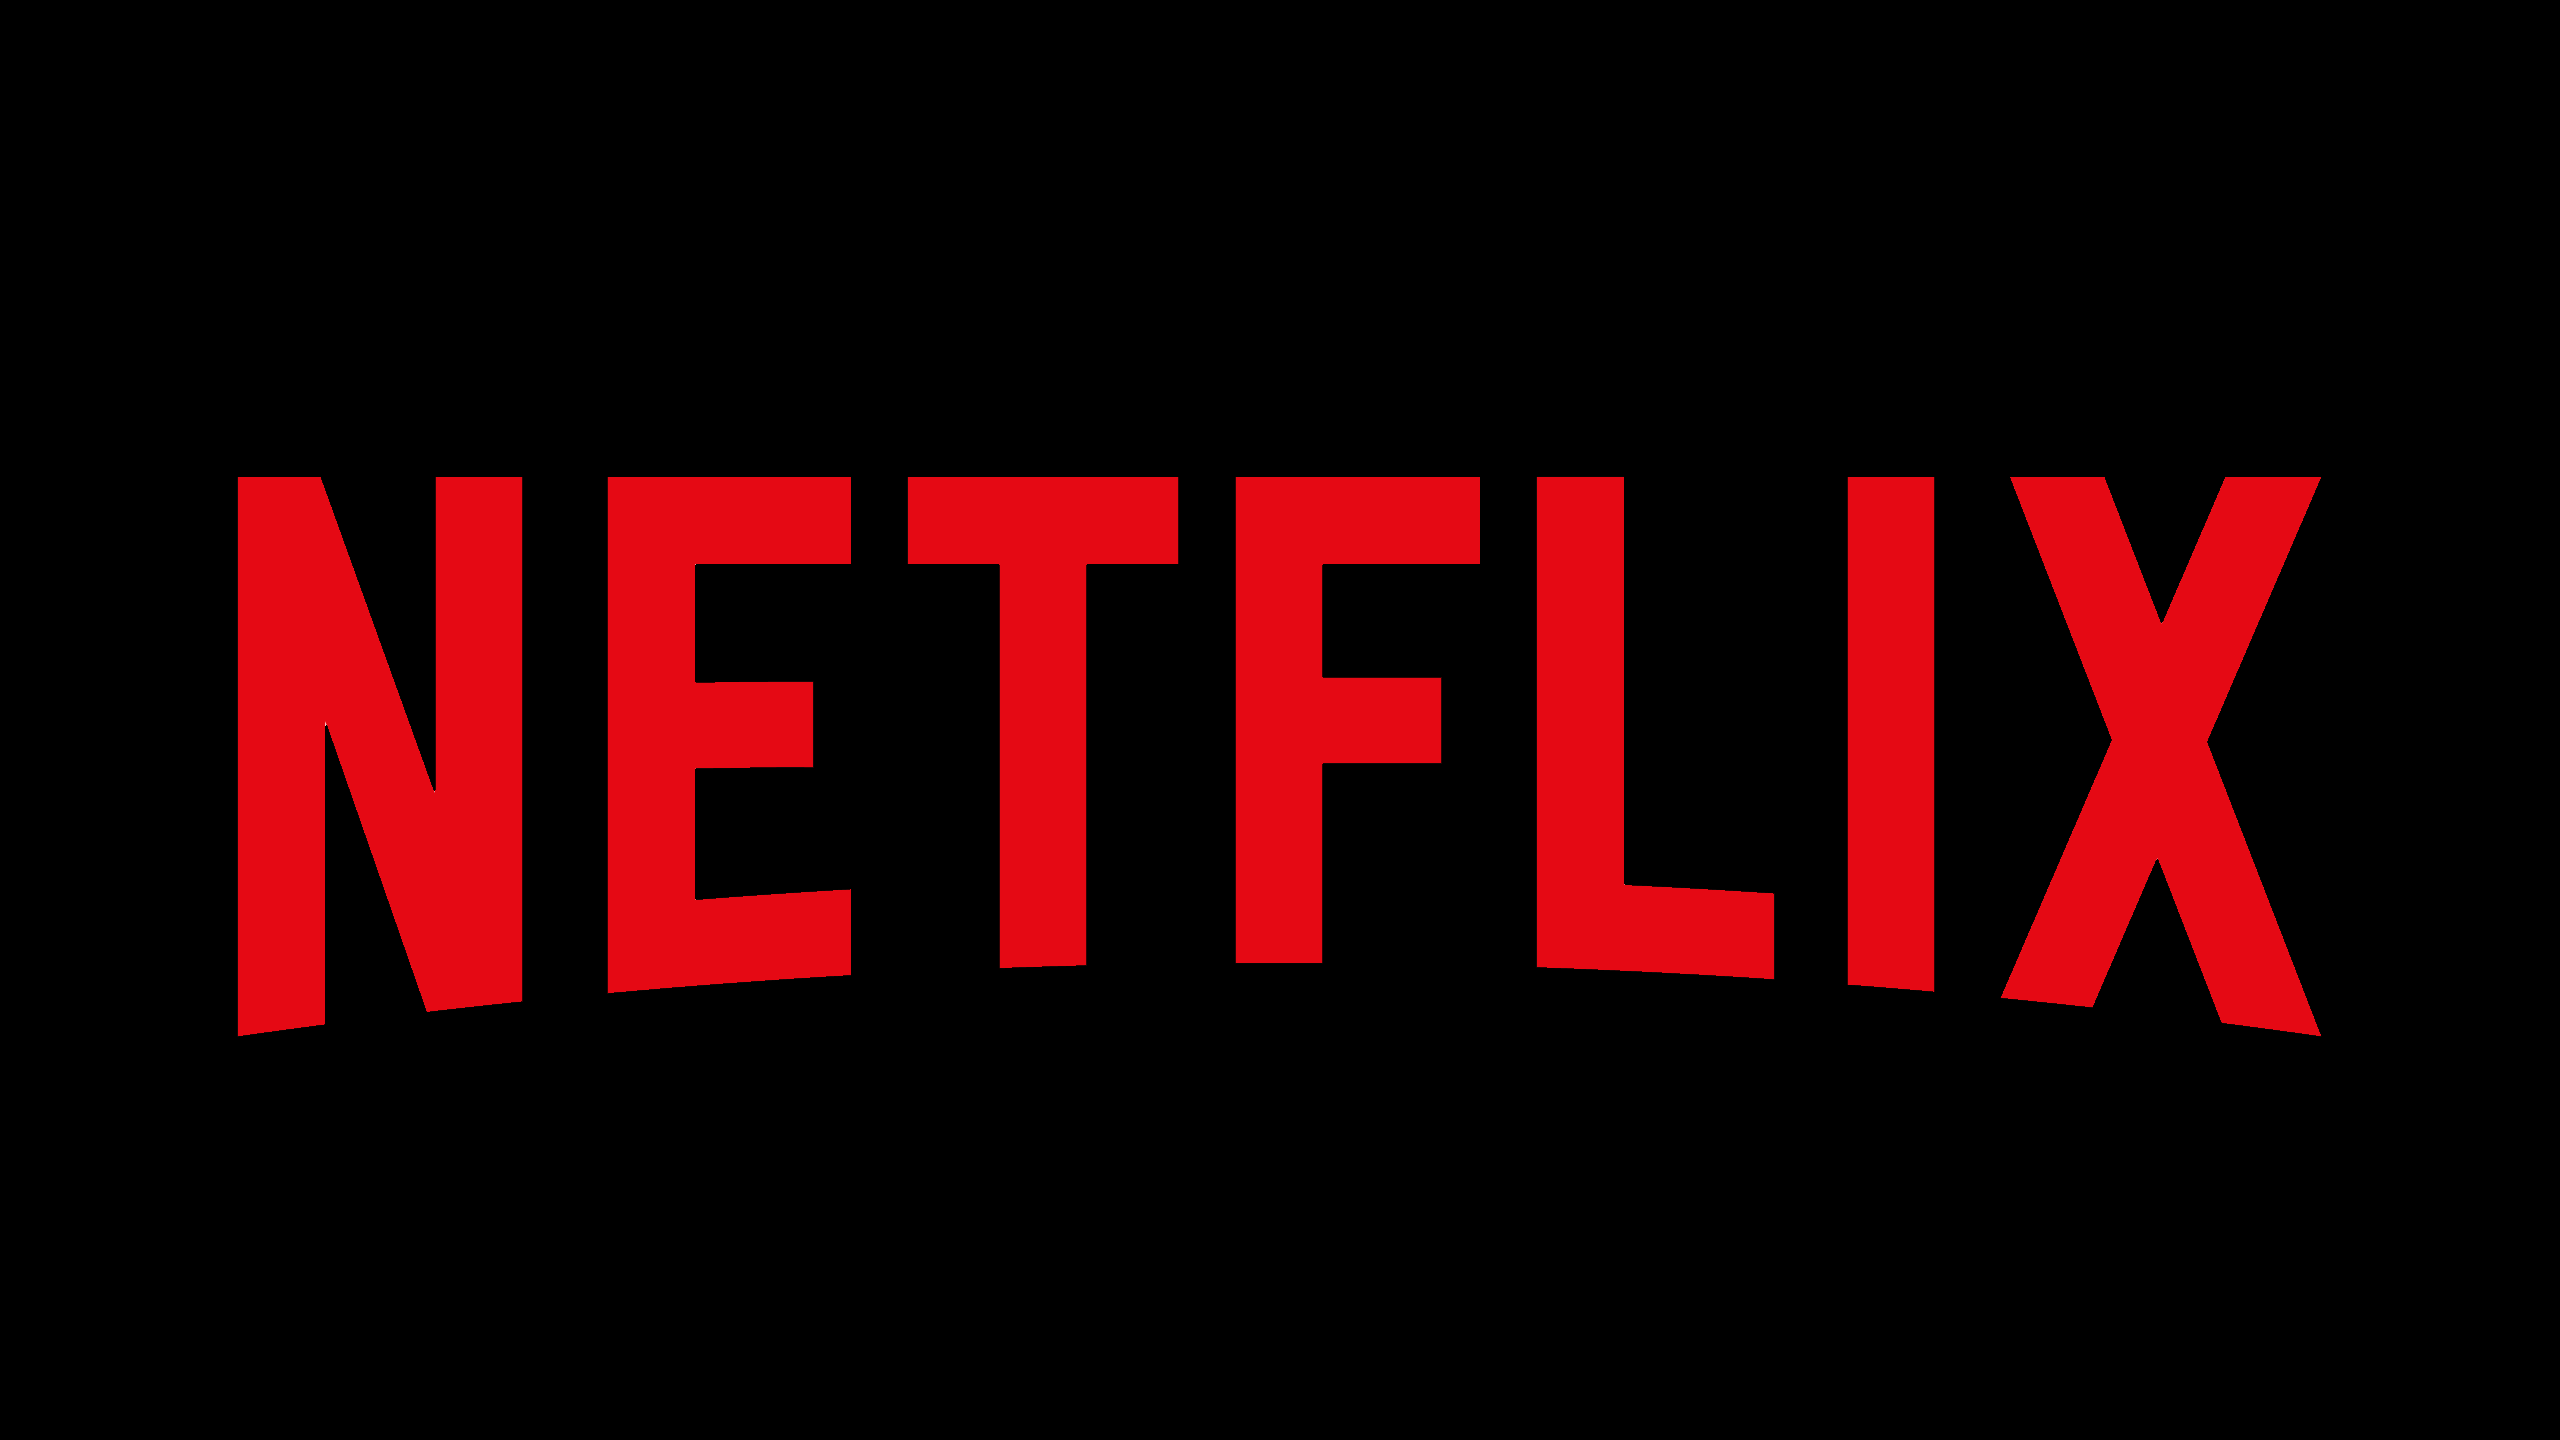

show_id → Unique identifier for the content

title → Title of the movie or TV show

director → Name of the director

cast → Cast of the movie or TV show

country → Country where the content was produced

date_added → Date when the content was added to Netflix

release_year → Year the content was released

rating → Age rating of the content (e.g., TV-14, TV-G)

duration → Duration (minutes for movies, seasons for TV shows)

listed_in → Categories or genres the content belongs to

description → Short summary of the content

type → Type of content (Movie or TV Show)

# Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ = pd.read_csv ("/kaggle/input/netlix-shows-and-movies/netflix_titles_nov_2019.csv")
df= df_.copy ()

# Data Control

In [3]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [4]:
df.head (3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


In [5]:
df.shape

(5837, 12)

In [6]:
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [7]:
df.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

In [8]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(3447, 12)

In [11]:
df.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

In [12]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

In [13]:
df.duplicated().sum()

0


# Examining Categorical Distributions

In [14]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 3447
Variables: 13
cat_cols: 2
num_cols: 2
cat_but_car: 7
num_but_cat: 0


In [15]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

cat_summary(df, "type")

         type      Ratio
type                    
Movie    3384  98.172324
TV Show    63   1.827676
##########################################


In [16]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

cat_summary(df, "rating")

          rating      Ratio
rating                     
TV-MA       1135  32.927183
TV-14        827  23.991877
R            432  12.532637
TV-PG        334   9.689585
PG-13        222   6.440383
NR           175   5.076878
PG           154   4.467653
TV-G          53   1.537569
TV-Y7         43   1.247462
G             30   0.870322
TV-Y          23   0.667247
TV-Y7-FV      11   0.319118
UR             7   0.203075
NC-17          1   0.029011
##########################################


In [17]:
df.groupby("country").agg({"rating": "count"}).sort_values(by="rating", ascending=False)

,rating
country,
United States,1206
India,628
United Kingdom,139
Canada,76
Spain,69
...,...
"Italy, Canada, France",1
"Italy, Belgium, France",1
"Bulgaria, United States, Spain, Canada",1


In [18]:
df["type"].value_counts()

type
Movie      3384
TV Show      63
Name: count, dtype: int64

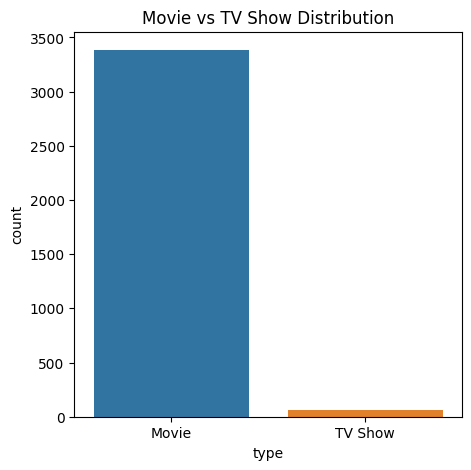

In [19]:

# Countplot grafiğini oluştur
sns.countplot(x='type', data=df)

# Başlık ekle
plt.title('Movie vs TV Show Distribution')

# Grafik boyutlarını ayarla
plt.gcf().set_size_inches(5, 5)

# Grafiği göster
plt.show()

In [20]:
df["rating"].value_counts()

rating
TV-MA       1135
TV-14        827
R            432
TV-PG        334
PG-13        222
NR           175
PG           154
TV-G          53
TV-Y7         43
G             30
TV-Y          23
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64

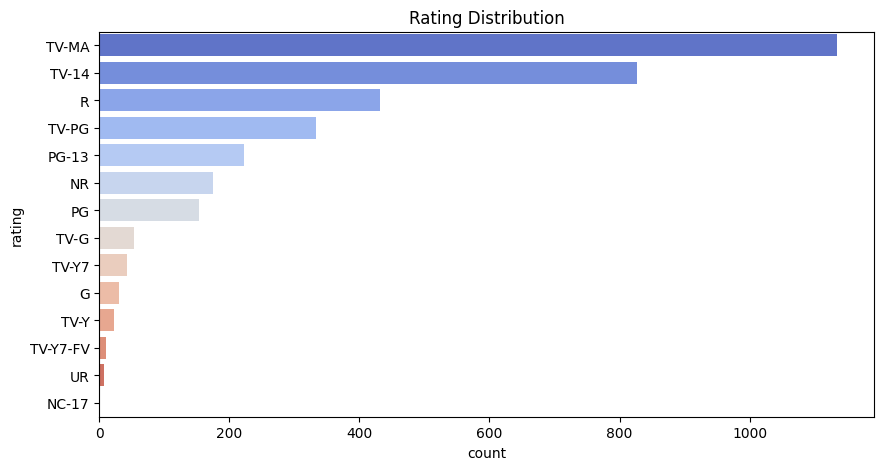

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Rating Distribution")
plt.show()

# Time Series Analysis

**Number of Content Added (by Year)**

In [22]:
df['year_added'] = df['date_added'].dt.year  # Yıla göre gruplama
df['year_added'].value_counts()

year_added
2019    1215
2018    1137
2017     795
2016     209
2015      49
2014      14
2011      13
2013       7
2012       4
2009       2
2010       1
2008       1
Name: count, dtype: int64

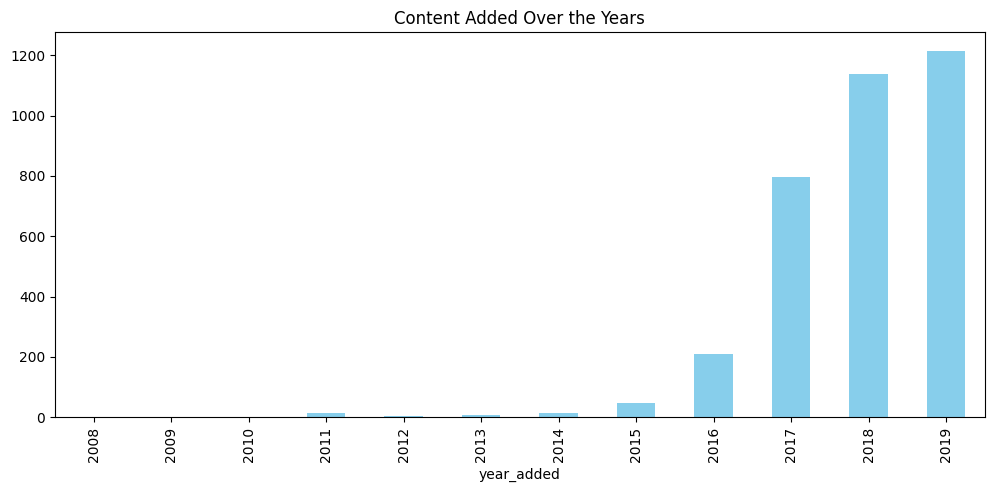

In [23]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.title("Content Added Over the Years")
plt.show()

# Distribution by Countries

**Examining the 10 countries that produce the most content**

In [24]:
df['country'].value_counts().head(10)

country
United States     1206
India              628
United Kingdom     139
Canada              76
Spain               69
Turkey              59
Mexico              48
Hong Kong           48
Japan               46
France              44
Name: count, dtype: int64

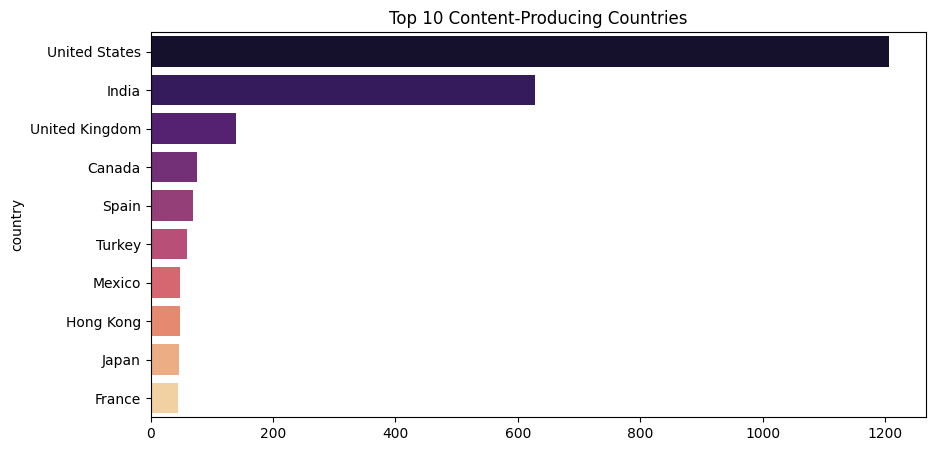

In [25]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Content-Producing Countries")
plt.show()

# Most Popular Categories

**To see the types with the most content**

In [26]:
from collections import Counter

# 'listed_in' sütunundaki kategorileri ayır ve bir listeye yerleştir
categories = df['listed_in'].str.split(', ')  # Her satırdaki kategorileri virgülle ayır

# Listeyi düzleştir: Alt listeleri tek bir listeye birleştir
all_categories = []  # Kategorilerin hepsini burada saklayacağız
for sublist in categories.dropna():  # Boş olanları çıkar
    for genre in sublist:  # Her kategoriye eriş
        all_categories.append(genre)  # Kategoriyi listeye ekle

# Kategorilerin sayısını hesapla
category_counts = Counter(all_categories)  # Her kategorinin kaç kez geçtiğini say

# En çok geçen 10 kategoriyi al
top_10_categories = category_counts.most_common(10)  # En popüler 10 kategori

# Sonuçları yazdır
top_10_categories


[('International Movies', 1610),
 ('Dramas', 1449),
 ('Comedies', 948),
 ('Action & Adventure', 521),
 ('Independent Movies', 509),
 ('Thrillers', 348),
 ('Romantic Movies', 329),
 ('Documentaries', 301),
 ('Children & Family Movies', 292),
 ('Stand-Up Comedy', 233)]

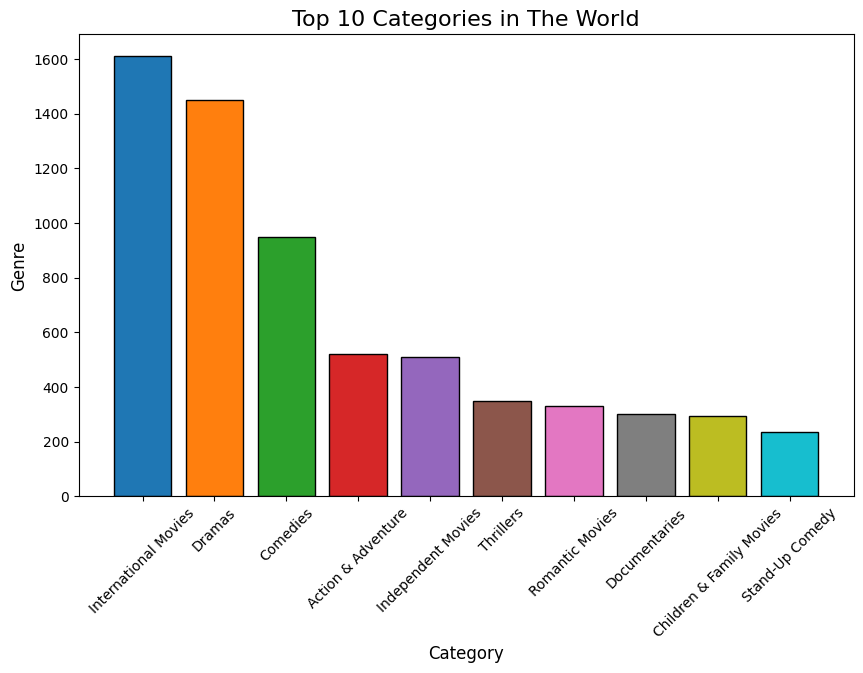

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Veriyi hazırlıyoruz
categories = ['International Movies', 'Dramas', 'Comedies', 'Action & Adventure', 'Independent Movies', 
              'Thrillers', 'Romantic Movies', 'Documentaries', 'Children & Family Movies', 'Stand-Up Comedy']
counts = [1610, 1449, 948, 521, 509, 348, 329, 301, 292, 233]

# Farklı renkler için renk paleti oluştur
colors = matplotlib.colormaps['tab10'](np.linspace(0, 1, len(categories)))  # renk paleti

# Grafik boyutlarını ayarla
plt.figure(figsize=(10, 6))

# Her bir kategoriyi farklı renkte sütun olarak çiz
bars = plt.bar(categories, counts, color=colors, edgecolor='black')

# Başlık ve etiketler ekle
plt.title('Top 10 Categories in The World', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Genre', fontsize=12)  # Y eksenine "Genre" etiketini ekledik

# Etiketlerin döndürülmesi
plt.xticks(rotation=45)

# Grafiği göster
plt.show()

In [28]:
df.loc[(df["country"] == "Turkey") & (df["type"] == "Movie")].head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added
318,81132444,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...,Movie,2019
359,81132442,"Love, Surreal and Odd",Yılmaz Erdoğan,"Aylin Kontante, Bülent Emrah Parlak, Büşra Pek...",Turkey,2019-10-18,2017,TV-14,95 min,"Comedies, International Movies, Romantic Movies",When a group of people meets at the same party...,Movie,2019
394,81132441,Bygones Be Bygones,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru, Salih K...",Turkey,2019-10-11,2017,TV-MA,104 min,"Comedies, International Movies, Romantic Movies",A mother's plan to find her bachelor son a mat...,Movie,2019
419,81158574,Brother in Love,Onur Bilgetay,"Cem Gelinoğlu, Melis Babadag, Ege Kökenli, Müf...",Turkey,2019-10-04,2019,TV-14,110 min,"Comedies, International Movies, Romantic Movies",A robbery leaves a proprietor penniless before...,Movie,2019
422,81132440,Kids on the Block,Tugçe Soysop,"Selim Bayraktar, Berat Efe Parlar, Esat Polat ...",Turkey,2019-10-04,2019,TV-PG,102 min,"Children & Family Movies, Comedies",When their fun in the park is threatened by a ...,Movie,2019
522,81132443,Deliha 2,Gupse Özay,"Gupse Özay, Eda Ece, Aksel Bonfil, Derya Alabo...",Turkey,2019-09-27,2018,TV-PG,102 min,"Comedies, International Movies","While chasing her dream of becoming a chef, Ze...",Movie,2019
567,81132439,Travel Mates 2,Bedran Güzel,"Oğuzhan Koç, İbrahim Büyükak, Ezgi Eyüboğlu, O...",Turkey,2019-09-20,2018,TV-14,111 min,"Comedies, International Movies",When struggling singer Onur decides to return ...,Movie,2019
603,81132438,Locked on You,Kıvanç Baruönü,"Ata Demirer, Demet Akbağ, Gonca Vuslateri, İlk...",Turkey,2019-09-13,2018,TV-14,105 min,"Comedies, International Movies","When his chatty nature lands him in trouble, a...",Movie,2019
1424,81076251,Money Trap,Yılmaz Erdoğan,"Yılmaz Erdoğan, Kıvanç Tatlıtuğ, Ezgi Mola, Be...",Turkey,2019-04-26,2019,TV-MA,122 min,"Comedies, Dramas, International Movies",When his daughter and son-in-law fall prey to ...,Movie,2019
1473,81043542,Dabbe 6: The Return,Hasan Karacadağ,"Sema Şimşek, Nilay Gök, Volkan Ünal, Fehmi Kar...",Turkey,2019-04-17,2015,TV-MA,153 min,"Horror Movies, International Movies",A cardiologist tries to pinpoint the cause of ...,Movie,2019


In [29]:
from collections import Counter

# Türkiye'deki filmleri seç
turkey_df = df[df['country'] == 'Turkey']

# 'listed_in' sütunundaki kategorileri ayır
categories = turkey_df['listed_in'].str.split(', ')  # Her satırdaki kategorileri virgülle ayır

# Listeyi düzleştir: Alt listeleri tek bir listeye birleştir
all_categories = []  # Kategorilerin hepsini burada saklayacağız
for sublist in categories.dropna():  # Boş olanları çıkar
    for genre in sublist:  # Her kategoriye eriş
        all_categories.append(genre)  # Kategoriyi listeye ekle

# Kategorilerin sayısını hesapla
category_counts = Counter(all_categories)  # Her kategorinin kaç kez geçtiğini say

# Sonuçları yazdır
top_categories = category_counts.most_common()  # En popüler türler

# En popüler 10 türü yazdır
top_categories[:10]

[('International Movies', 53),
 ('Comedies', 44),
 ('Romantic Movies', 16),
 ('Dramas', 15),
 ('International TV Shows', 4),
 ('TV Dramas', 4),
 ('Horror Movies', 3),
 ('Action & Adventure', 3),
 ('Crime TV Shows', 2),
 ('Thrillers', 1)]

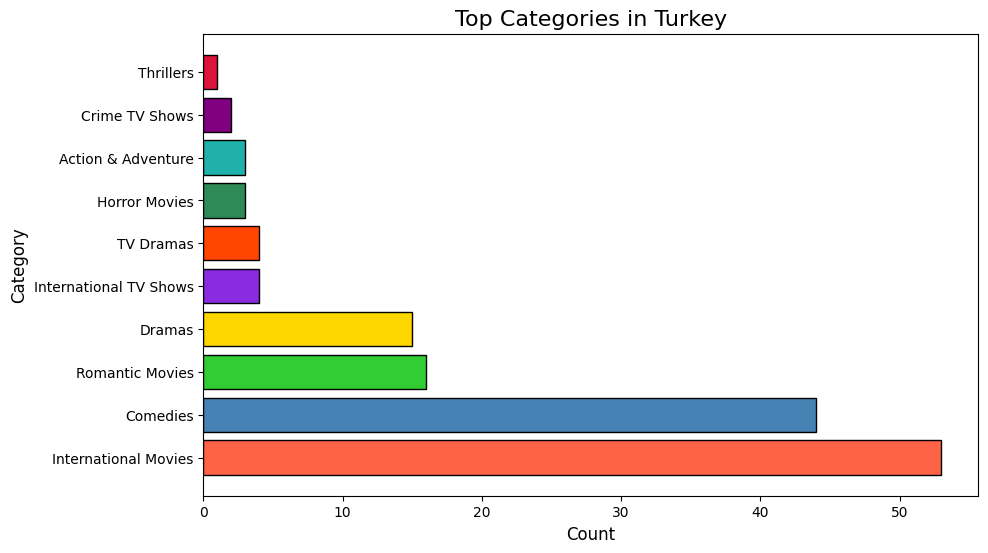

In [30]:
# Kategoriler ve sayılar
categories = ['International Movies', 'Comedies', 'Romantic Movies', 'Dramas', 
              'International TV Shows', 'TV Dramas', 'Horror Movies', 
              'Action & Adventure', 'Crime TV Shows', 'Thrillers']
counts = [53, 44, 16, 15, 4, 4, 3, 3, 2, 1]

# Grafik boyutlarını ayarla
plt.figure(figsize=(10, 6))

# Özel renkler
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', 
          '#8A2BE2', '#FF4500', '#2E8B57', '#20B2AA', 
          '#800080', '#DC143C']

# Sütun grafiğini oluştur
plt.barh(categories, counts, color=colors, edgecolor='black')

# Başlık ve etiketler ekle
plt.title('Top Categories in Turkey', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Grafiği göster
plt.show()

In [31]:
df[df['country'] == 'Turkey']['director'].value_counts().head(10)

director
Hakan Algül         7
Yılmaz Erdoğan      6
Kıvanç Baruönü      5
Ozan Açıktan        4
Bedran Güzel        3
Hasan Karacadağ     3
Sermiyan Midyat     2
Burak Aksak         2
Ömer Faruk Sorak    2
Cem Yılmaz          2
Name: count, dtype: int64

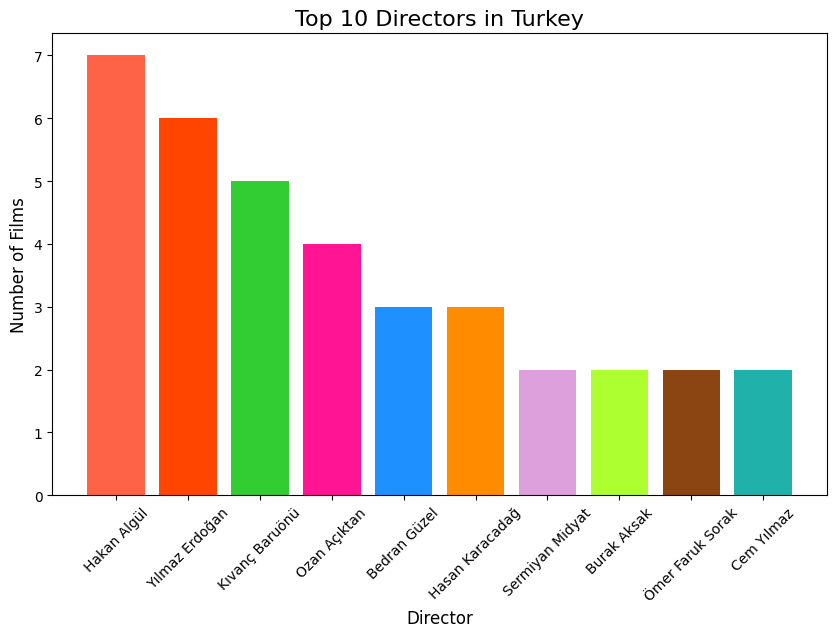

In [32]:
# Veriyi hazırlıyoruz
directors = ['Hakan Algül', 'Yılmaz Erdoğan', 'Kıvanç Baruönü', 'Ozan Açıktan', 'Bedran Güzel', 
             'Hasan Karacadağ', 'Sermiyan Midyat', 'Burak Aksak', 'Ömer Faruk Sorak', 'Cem Yılmaz']
counts = [7, 6, 5, 4, 3, 3, 2, 2, 2, 2]

# Grafik boyutlarını ayarla
plt.figure(figsize=(10, 6))

# Sütun grafiğini oluştur
plt.bar(directors, counts, color=['#ff6347', '#ff4500', '#32cd32', '#ff1493', '#1e90ff', 
                                 '#ff8c00', '#dda0dd', '#adff2f', '#8b4513', '#20b2aa'])

# Başlık ve etiketler ekle
plt.title('Top 10 Directors in Turkey', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)

# Etiketlerin döndürülmesi
plt.xticks(rotation=45)

# Grafiği göster
plt.show()

In [33]:
df[df['country'] == 'Turkey']['release_year'].value_counts()

release_year
2015    11
2014    10
2016     7
2013     6
2017     5
2019     3
2018     3
2012     3
2010     3
2005     2
2011     2
2004     2
2006     1
2001     1
Name: count, dtype: int64

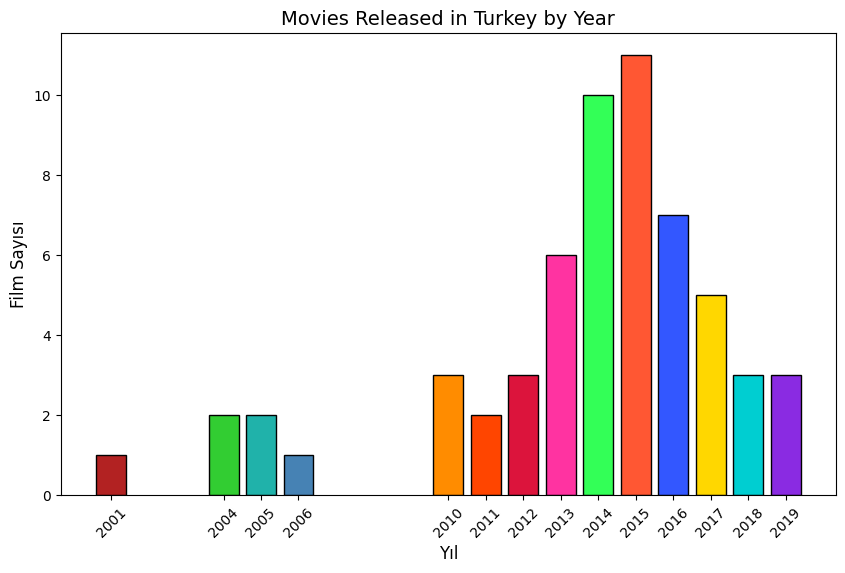

In [34]:
import matplotlib.pyplot as plt

# Yıl ve film sayısı verileri
years = [2015, 2014, 2016, 2013, 2017, 2019, 2018, 2012, 2010, 2005, 2011, 2004, 2006, 2001]
counts = [11, 10, 7, 6, 5, 3, 3, 3, 3, 2, 2, 2, 1, 1]

# Özel renk paleti (her sütun için farklı renk)
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFD700", 
          "#8A2BE2", "#00CED1", "#DC143C", "#FF8C00", "#20B2AA", 
          "#FF4500", "#32CD32", "#4682B4", "#B22222"]

# Grafik boyutunu ayarla
plt.figure(figsize=(10, 6))

# Sütun grafiğini çiz
plt.bar(years, counts, color=colors, edgecolor='black')

# Başlık ve eksen etiketleri ekle
plt.title('Movies Released in Turkey by Year', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Film Sayısı', fontsize=12)

# X eksenindeki yıl etiketlerini düzenle
plt.xticks(years, rotation=45)

# Grafiği göster
plt.show()


In [35]:
from collections import Counter

# Türkiye'deki filmleri seç
turkey_df = df[df['country'] == 'Turkey']

# 'cast' sütunundaki oyuncuları ayır
actors = turkey_df['cast'].str.split(', ')  # Oyuncuları virgülle ayır

# Listeyi düzleştir: Alt listeleri tek bir listeye birleştir
all_actors = []  # Oyuncuların hepsini burada saklayacağız
for sublist in actors.dropna():  # Boş olanları çıkar
    for actor in sublist:  # Her oyuncuya eriş
        all_actors.append(actor)  # Oyuncuyu listeye ekle

# Oyuncuların sayısını hesapla
actor_counts = Counter(all_actors)  # Her oyuncunun kaç kez geçtiğini say

# Sonuçları yazdır
top_actors = actor_counts.most_common()  # En popüler oyuncular

# En popüler 10 oyuncuyu yazdır
top_actors[:10]

[('Demet Akbağ', 11),
 ('Ata Demirer', 7),
 ('Cezmi Baskın', 7),
 ('Tarık Ünlüoğlu', 6),
 ('Yılmaz Erdoğan', 6),
 ('Devrim Yakut', 6),
 ('Cengiz Bozkurt', 6),
 ('Cem Yılmaz', 6),
 ('Gupse Özay', 5),
 ('Salih Kalyon', 5)]

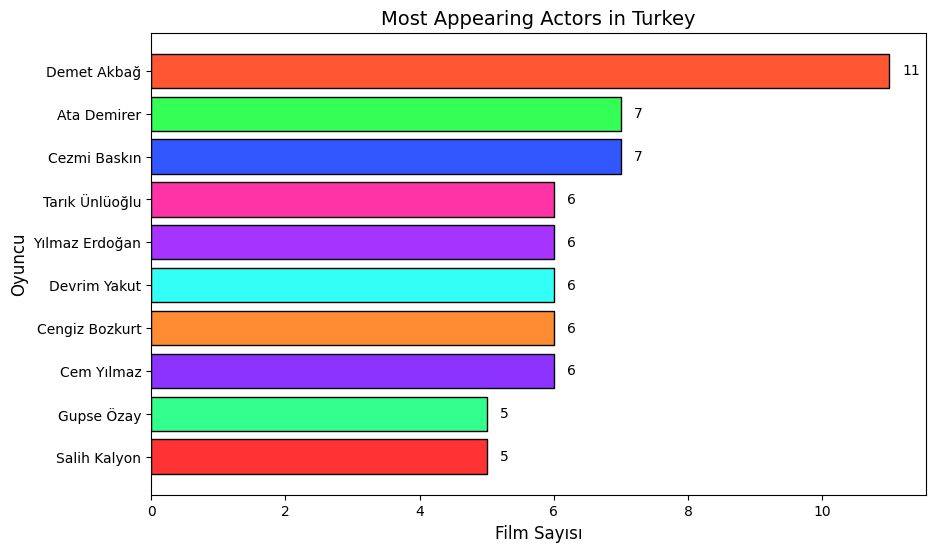

In [36]:
# Veriyi hazırla
actors = ['Demet Akbağ', 'Ata Demirer', 'Cezmi Baskın', 'Tarık Ünlüoğlu', 'Yılmaz Erdoğan', 
          'Devrim Yakut', 'Cengiz Bozkurt', 'Cem Yılmaz', 'Gupse Özay', 'Salih Kalyon']
counts = [11, 7, 7, 6, 6, 6, 6, 6, 5, 5]

# Grafik boyutu
plt.figure(figsize=(10, 6))

# Farklı renklerle sütun grafiği çiz
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#A633FF', 
          '#33FFF6', '#FF8C33', '#8C33FF', '#33FF8C', '#FF3333']

plt.barh(actors, counts, color=colors, edgecolor='black')

# Başlık ve etiketler
plt.xlabel('Film Sayısı', fontsize=12)
plt.ylabel('Oyuncu', fontsize=12)
plt.title('Most Appearing Actors in Turkey', fontsize=14)

# Değerleri sütunların üzerine ekle
for index, value in enumerate(counts):
    plt.text(value + 0.2, index, str(value), va='center', fontsize=10)

# Grafik düzenleme
plt.gca().invert_yaxis()  # En çok oynayanı en üstte göstermek için
plt.show()